In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
file_path = "datasets/STRAWBERRY SALES 2023 - Sheet1.tsv"

In [4]:
df = pd.read_csv(file_path, sep='\t', skiprows=2)

print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| DATE      | #CLAMSHELLS   | #BOXES   | #KILOS   | $/BOX   | TOTAL      | PRODUCT    | TYPE OF PRODUCT   |
|:----------|:--------------|:---------|:---------|:--------|:-----------|:-----------|:------------------|
| 18-Oct-23 | 424           | 53       | 212      | $ 12.00 | $ 636.00   | STRAWBERRY | CONVENTIONAL      |
| 21-Oct-23 | 560           | 70       | 280      | $ 13.89 | $ 972.22   | STRAWBERRY | CONVENTIONAL      |
| 23-Oct-23 | 240           | 30       | 120      | $ 12.22 | $ 366.67   | STRAWBERRY | CONVENTIONAL      |
| 26-Oct-23 | 1152          | 144      | 576      | $ 10.50 | $ 1,512.00 | STRAWBERRY | CONVENTIONAL      |
| 28-Oct-23 | 728           | 91       | 364      | $ 10.56 | $ 960.56   | STRAWBERRY | CONVENTIONAL      |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DATE             52 non-null     object
 1   #C

In [5]:
df["TYPE OF PRODUCT"].unique()

array(['CONVENTIONAL', 'ORGANIC'], dtype=object)

In [6]:
df["DATE"] = pd.to_datetime(df["DATE"])
df["DAY_OF_WEEK"] = df["DATE"].dt.day_name()

df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13860\1375887877.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DATE"] = pd.to_datetime(df["DATE"])


,DATE,#CLAMSHELLS,#BOXES,#KILOS,$/BOX,TOTAL,PRODUCT,TYPE OF PRODUCT,DAY_OF_WEEK
0,2023-10-18,424,53,212,$ 12.00,$ 636.00,STRAWBERRY,CONVENTIONAL,Wednesday
1,2023-10-21,560,70,280,$ 13.89,$ 972.22,STRAWBERRY,CONVENTIONAL,Saturday
2,2023-10-23,240,30,120,$ 12.22,$ 366.67,STRAWBERRY,CONVENTIONAL,Monday
3,2023-10-26,1152,144,576,$ 10.50,"$ 1,512.00",STRAWBERRY,CONVENTIONAL,Thursday
4,2023-10-28,728,91,364,$ 10.56,$ 960.56,STRAWBERRY,CONVENTIONAL,Saturday


In [7]:
df["$/BOX"] = df["$/BOX"].str.replace('$', '').astype(float)

In [10]:
df["TOTAL"] = df["TOTAL"].str.replace('$', '').str.replace(',','').astype(float)

In [12]:
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

| DATE                | #CLAMSHELLS   | #BOXES   | #KILOS   | $/BOX   | TOTAL   | PRODUCT    | TYPE OF PRODUCT   | DAY_OF_WEEK   |
|:--------------------|:--------------|:---------|:---------|:--------|:--------|:-----------|:------------------|:--------------|
| 2023-10-18 00:00:00 | 424           | 53       | 212      | 12      | 636     | STRAWBERRY | CONVENTIONAL      | Wednesday     |
| 2023-10-21 00:00:00 | 560           | 70       | 280      | 13.89   | 972.22  | STRAWBERRY | CONVENTIONAL      | Saturday      |
| 2023-10-23 00:00:00 | 240           | 30       | 120      | 12.22   | 366.67  | STRAWBERRY | CONVENTIONAL      | Monday        |
| 2023-10-26 00:00:00 | 1152          | 144      | 576      | 10.5    | 1512    | STRAWBERRY | CONVENTIONAL      | Thursday      |
| 2023-10-28 00:00:00 | 728           | 91       | 364      | 10.56   | 960.56  | STRAWBERRY | CONVENTIONAL      | Saturday      |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns 

In [13]:
sales_pivot = df.pivot_table(index='TYPE OF PRODUCT', columns='DAY_OF_WEEK', values='TOTAL', aggfunc='mean')

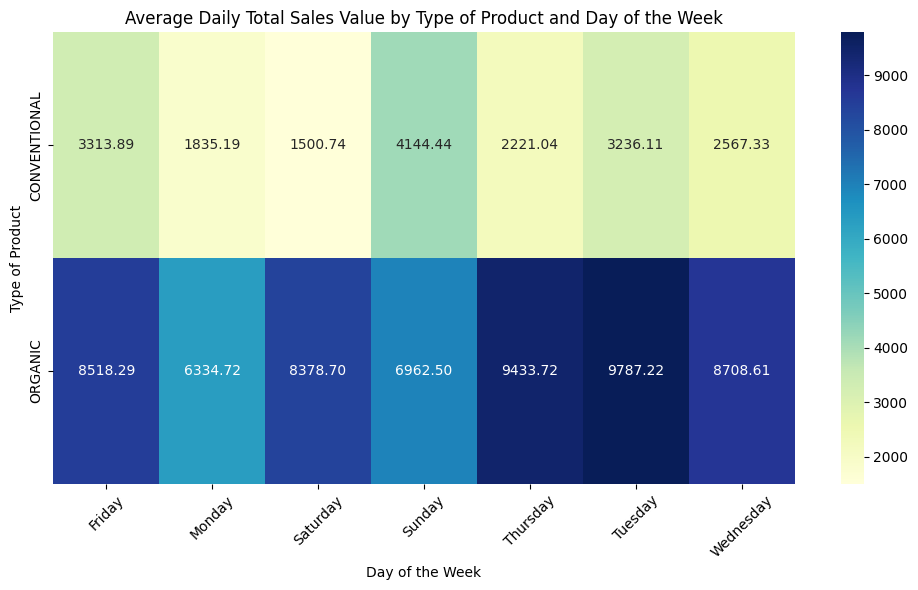

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Daily Total Sales Value by Type of Product and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Type of Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

| DATE      | #CLAMSHELLS   | #BOXES   | #KILOS   | $/BOX   | TOTAL      | PRODUCT    | TYPE OF PRODUCT   |
|:----------|:--------------|:---------|:---------|:--------|:-----------|:-----------|:------------------|
| 18-Oct-23 | 424           | 53       | 212      | $ 12.00 | $ 636.00   | STRAWBERRY | CONVENTIONAL      |
| 21-Oct-23 | 560           | 70       | 280      | $ 13.89 | $ 972.22   | STRAWBERRY | CONVENTIONAL      |
| 23-Oct-23 | 240           | 30       | 120      | $ 12.22 | $ 366.67   | STRAWBERRY | CONVENTIONAL      |
| 26-Oct-23 | 1152          | 144      | 576      | $ 10.50 | $ 1,512.00 | STRAWBERRY | CONVENTIONAL      |
| 28-Oct-23 | 728           | 91       | 364      | $ 10.56 | $ 960.56   | STRAWBERRY | CONVENTIONAL      |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DATE             52 non-null     object
 1   #C

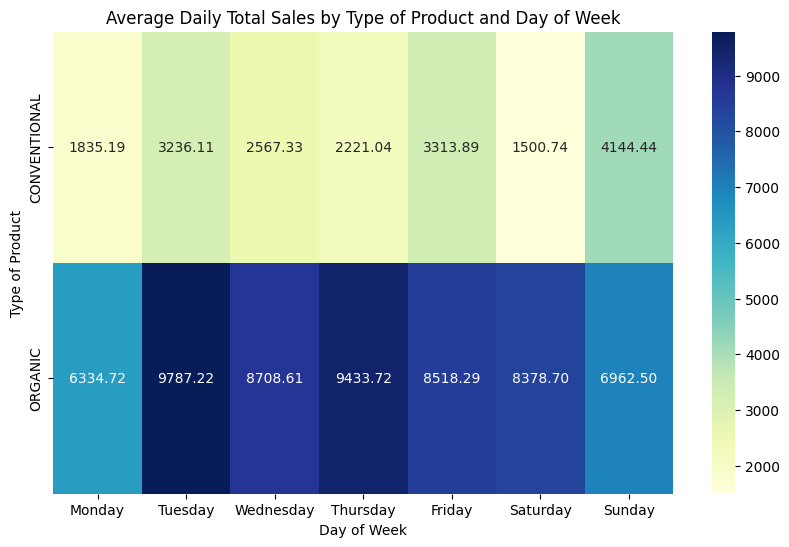

In [17]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the TSV file into a DataFrame, skipping the first 2 rows.
df = pd.read_csv('datasets/STRAWBERRY SALES 2023 - Sheet1.tsv', sep='\t', skiprows=2)

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Remove '$' from the `TOTAL` column
df['TOTAL'] = df['TOTAL'].astype(str).str.replace('$', '', regex=False)

# Remove leading and trailing spaces from each string within the `TOTAL` column
df['TOTAL'] = df['TOTAL'].astype(str).str.strip()

# Remove ',' from the `TOTAL` column
df['TOTAL'] = df['TOTAL'].astype(str).str.replace(',', '', regex=False)

# Convert the `TOTAL` column to numeric
df['TOTAL'] = pd.to_numeric(df['TOTAL'])

# Convert `DATE` to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%b-%y')

# Extract day of the week from `DATE`
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()

# Group by `TYPE OF PRODUCT` and `DAY_OF_WEEK`, calculate mean of `TOTAL`, and reset index
pivot_table = df.groupby(['TYPE OF PRODUCT', 'DAY_OF_WEEK'])['TOTAL'].mean().reset_index()

# Create a pivot table for the heatmap
heatmap_data = pivot_table.pivot(index='TYPE OF PRODUCT', columns='DAY_OF_WEEK', values='TOTAL')

# Order the columns by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[day_order]

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title('Average Daily Total Sales by Type of Product and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Type of Product')
plt.show()

In [18]:
# Now, let's create the heatmap visualizing the average daily total sales value
# for each type of product broken down by day of the week.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(avg_sales, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
heatmap.set_title('Average Daily Total Sales Value by Product Type and Day of the Week', pad=20)
plt.ylabel('Type of Product')
plt.xlabel('Day of the Week')

plt.show()

NameError: name 'avg_sales' is not defined

<Figure size 1000x600 with 0 Axes>